 like ratio & comment ratio

## Data Preprocessing
合并为新的csv

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
file_path = '../../data/processed-data//Normalized_Data_with _like_comment_ratio.csv'
df = pd.read_csv(file_path)
print('-------like ratio---------')
print(df['like_ratio'].describe())
print()
print('-------comment ratio---------')
print(df['comment_ratio'].describe())

-------like ratio---------
count    375.000000
mean       1.187740
std        1.201180
min        0.000000
25%        0.557778
50%        0.787268
75%        1.402276
max       12.401685
Name: like_ratio, dtype: float64

-------comment ratio---------
count    375.000000
mean       0.053684
std        0.083883
min        0.000000
25%        0.016598
50%        0.026350
75%        0.059631
max        0.963266
Name: comment_ratio, dtype: float64


like_ratio Segmentation based on quartiles

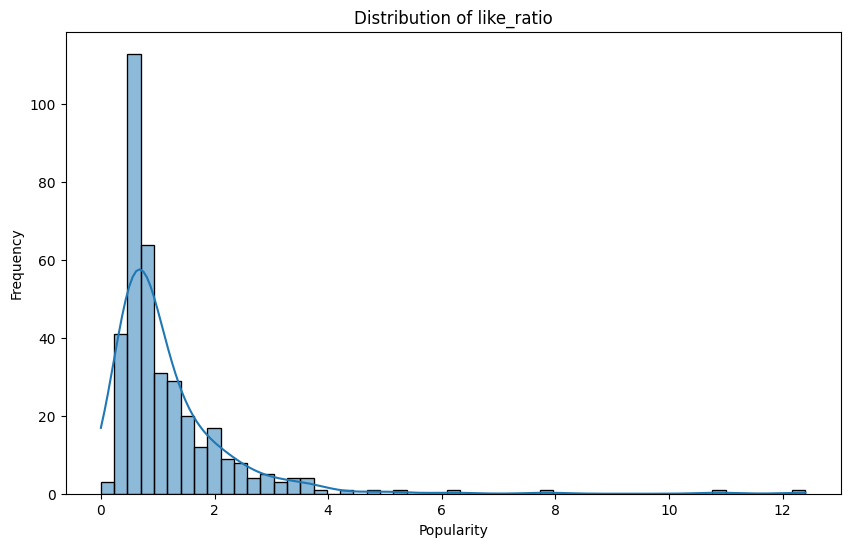

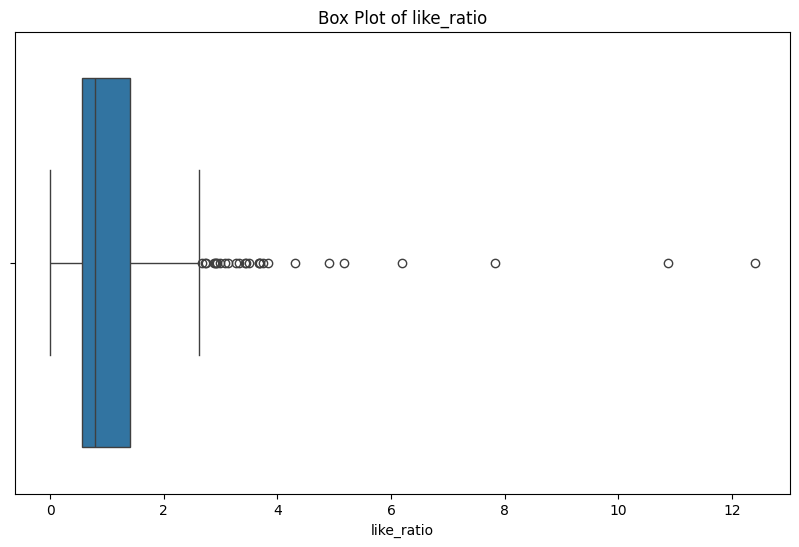

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# histplot build
plt.figure(figsize=(10, 6))
sns.histplot(df['like_ratio'], kde=True)
plt.title('Distribution of like_ratio')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

# boxplot build
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['like_ratio'])
plt.title('Box Plot of like_ratio')
plt.xlabel('like_ratio')
plt.show()

In [44]:
low_threshold = 0.7
high_threshold = 1.6
def classify_like_ratio(like_ratio):
    if like_ratio <= low_threshold:
        return 'Low'
    elif like_ratio <= high_threshold:
        return 'Medium'
    else:
        return 'High'


df['Like Ratio Category'] = df['like_ratio'].apply(classify_like_ratio)
# check like ratio category count
print(df['Like Ratio Category'].value_counts())


Like Ratio Category
Low       154
Medium    146
High       75
Name: count, dtype: int64


Feature Selection or Extraction

In [55]:
# Specify the feature columns
features = [
    'Days Since Published', 'View Count', 'Like Count', 'Comment Count',
    'Subscriber Count', 'Mean Sentiment Score',
    'Duration_seconds', 'singer_followers', 'singer_popularity'
]
# Ensure there are no missing values in the dataset
df = df.dropna(subset=features + ['Like Ratio Category'])


## Model Selection

1. **Model Rationale**: Explain the reasons for selecting specific models or algorithms.
2. **Overview of Algorithms**: Provide a brief overview of the algorithms used

我这里选择简单回归，决策树以及随机森林

In [ ]:
# 查看特征重要性
importances = rf_model.feature_importances_
for feature, importance in zip(features, importances):
    print(f"Feature: {feature}, Importance: {importance:.4f}")


Feature: Days Since Published, Importance: 0.2341
Feature: View Count, Importance: 0.1502
Feature: Like Count, Importance: 0.0826
Feature: Comment Count, Importance: 0.0884
Feature: Subscriber Count, Importance: 0.0725
Feature: Definition, Importance: 0.0049
Feature: Mean Sentiment Score, Importance: 0.0711
Feature: Duration_seconds, Importance: 0.0910
Feature: genre_label, Importance: 0.0486
Feature: singer_followers, Importance: 0.0795
Feature: singer_popularity, Importance: 0.0769


In [115]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data (PCA works best on standardized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=5)  # Choose the number of components to keep
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Explained variance ratio (how much variance each component explains)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# You can now use X_train_pca and X_test_pca for training your model


Explained Variance Ratio: [0.41826507 0.1782449  0.11526605 0.10813635 0.07119372]


In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

X = df[features]
y = df['Like Ratio Category']

# Data set splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


# Initialize the Logistic Regression model (One-vs-Rest for multi-class)
model = LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Cross-validation to get a better estimate of the model performance
cross_val_scores = cross_val_score(model, X_scaled, y, cv=5)
print("\nCross-validation scores:", cross_val_scores)
print("\nMean cross-validation score:", cross_val_scores.mean())

Accuracy: 0.7733333333333333

Classification Report:
               precision    recall  f1-score   support

        High       0.64      0.82      0.72        11
         Low       0.86      0.86      0.86        35
      Medium       0.73      0.66      0.69        29

    accuracy                           0.77        75
   macro avg       0.74      0.78      0.76        75
weighted avg       0.78      0.77      0.77        75


Cross-validation scores: [0.65333333 0.61333333 0.81333333 0.72       0.46666667]

Mean cross-validation score: 0.6533333333333333


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_lo

In [66]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# 创建一个包含过采样和欠采样的管道
sampling_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42))
])

In [69]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Cross-validation to get a better estimate of the model performance
cross_val_scores_dt = cross_val_score(dt_model, X_train_scaled, y_train, cv=5)
print("\nDecision Tree Cross-validation scores:", cross_val_scores_dt)
print("\nMean cross-validation score (Decision Tree):", cross_val_scores_dt.mean())



Decision Tree Accuracy: 0.6933333333333334

Decision Tree Classification Report:
               precision    recall  f1-score   support

        High       0.47      0.82      0.60        11
         Low       0.82      0.77      0.79        35
      Medium       0.70      0.55      0.62        29

    accuracy                           0.69        75
   macro avg       0.66      0.71      0.67        75
weighted avg       0.72      0.69      0.70        75


Decision Tree Cross-validation scores: [0.56666667 0.55       0.61666667 0.63333333 0.63333333]

Mean cross-validation score (Decision Tree): 0.6


In [195]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

#param_grid
param_grid_refined = {
    'max_depth': [3,4,5],  
    'min_samples_split': [8,10,15],
    'min_samples_leaf': [3,4,5,6],   
    'criterion': ['entropy'],        
    'class_weight': ['balanced']  
}

grid_search_refined = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_refined,
    cv=5,
    scoring='f1_macro', 
    n_jobs=-1
)

# train mode
grid_search_refined.fit(X_train_scaled, y_train)

print("Refined Best parameters:", grid_search_refined.best_params_)
print("Refined Best cross-validation score:", grid_search_refined.best_score_)

best_model_refined = DecisionTreeClassifier(
    **grid_search_refined.best_params_
)

best_model_refined.fit(X_train_scaled, y_train)

y_pred_refined = best_model_refined.predict(X_test_scaled)
print("\nRefined Test set accuracy:", accuracy_score(y_test, y_pred_refined))
print("\nRefined Classification Report:\n", classification_report(y_test, y_pred_refined))


Refined Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 8}
Refined Best cross-validation score: 0.6208158730661306

Refined Test set accuracy: 0.7466666666666667

Refined Classification Report:
               precision    recall  f1-score   support

        High       0.56      0.91      0.69        11
         Low       0.85      0.83      0.84        35
      Medium       0.74      0.59      0.65        29

    accuracy                           0.75        75
   macro avg       0.72      0.77      0.73        75
weighted avg       0.77      0.75      0.75        75



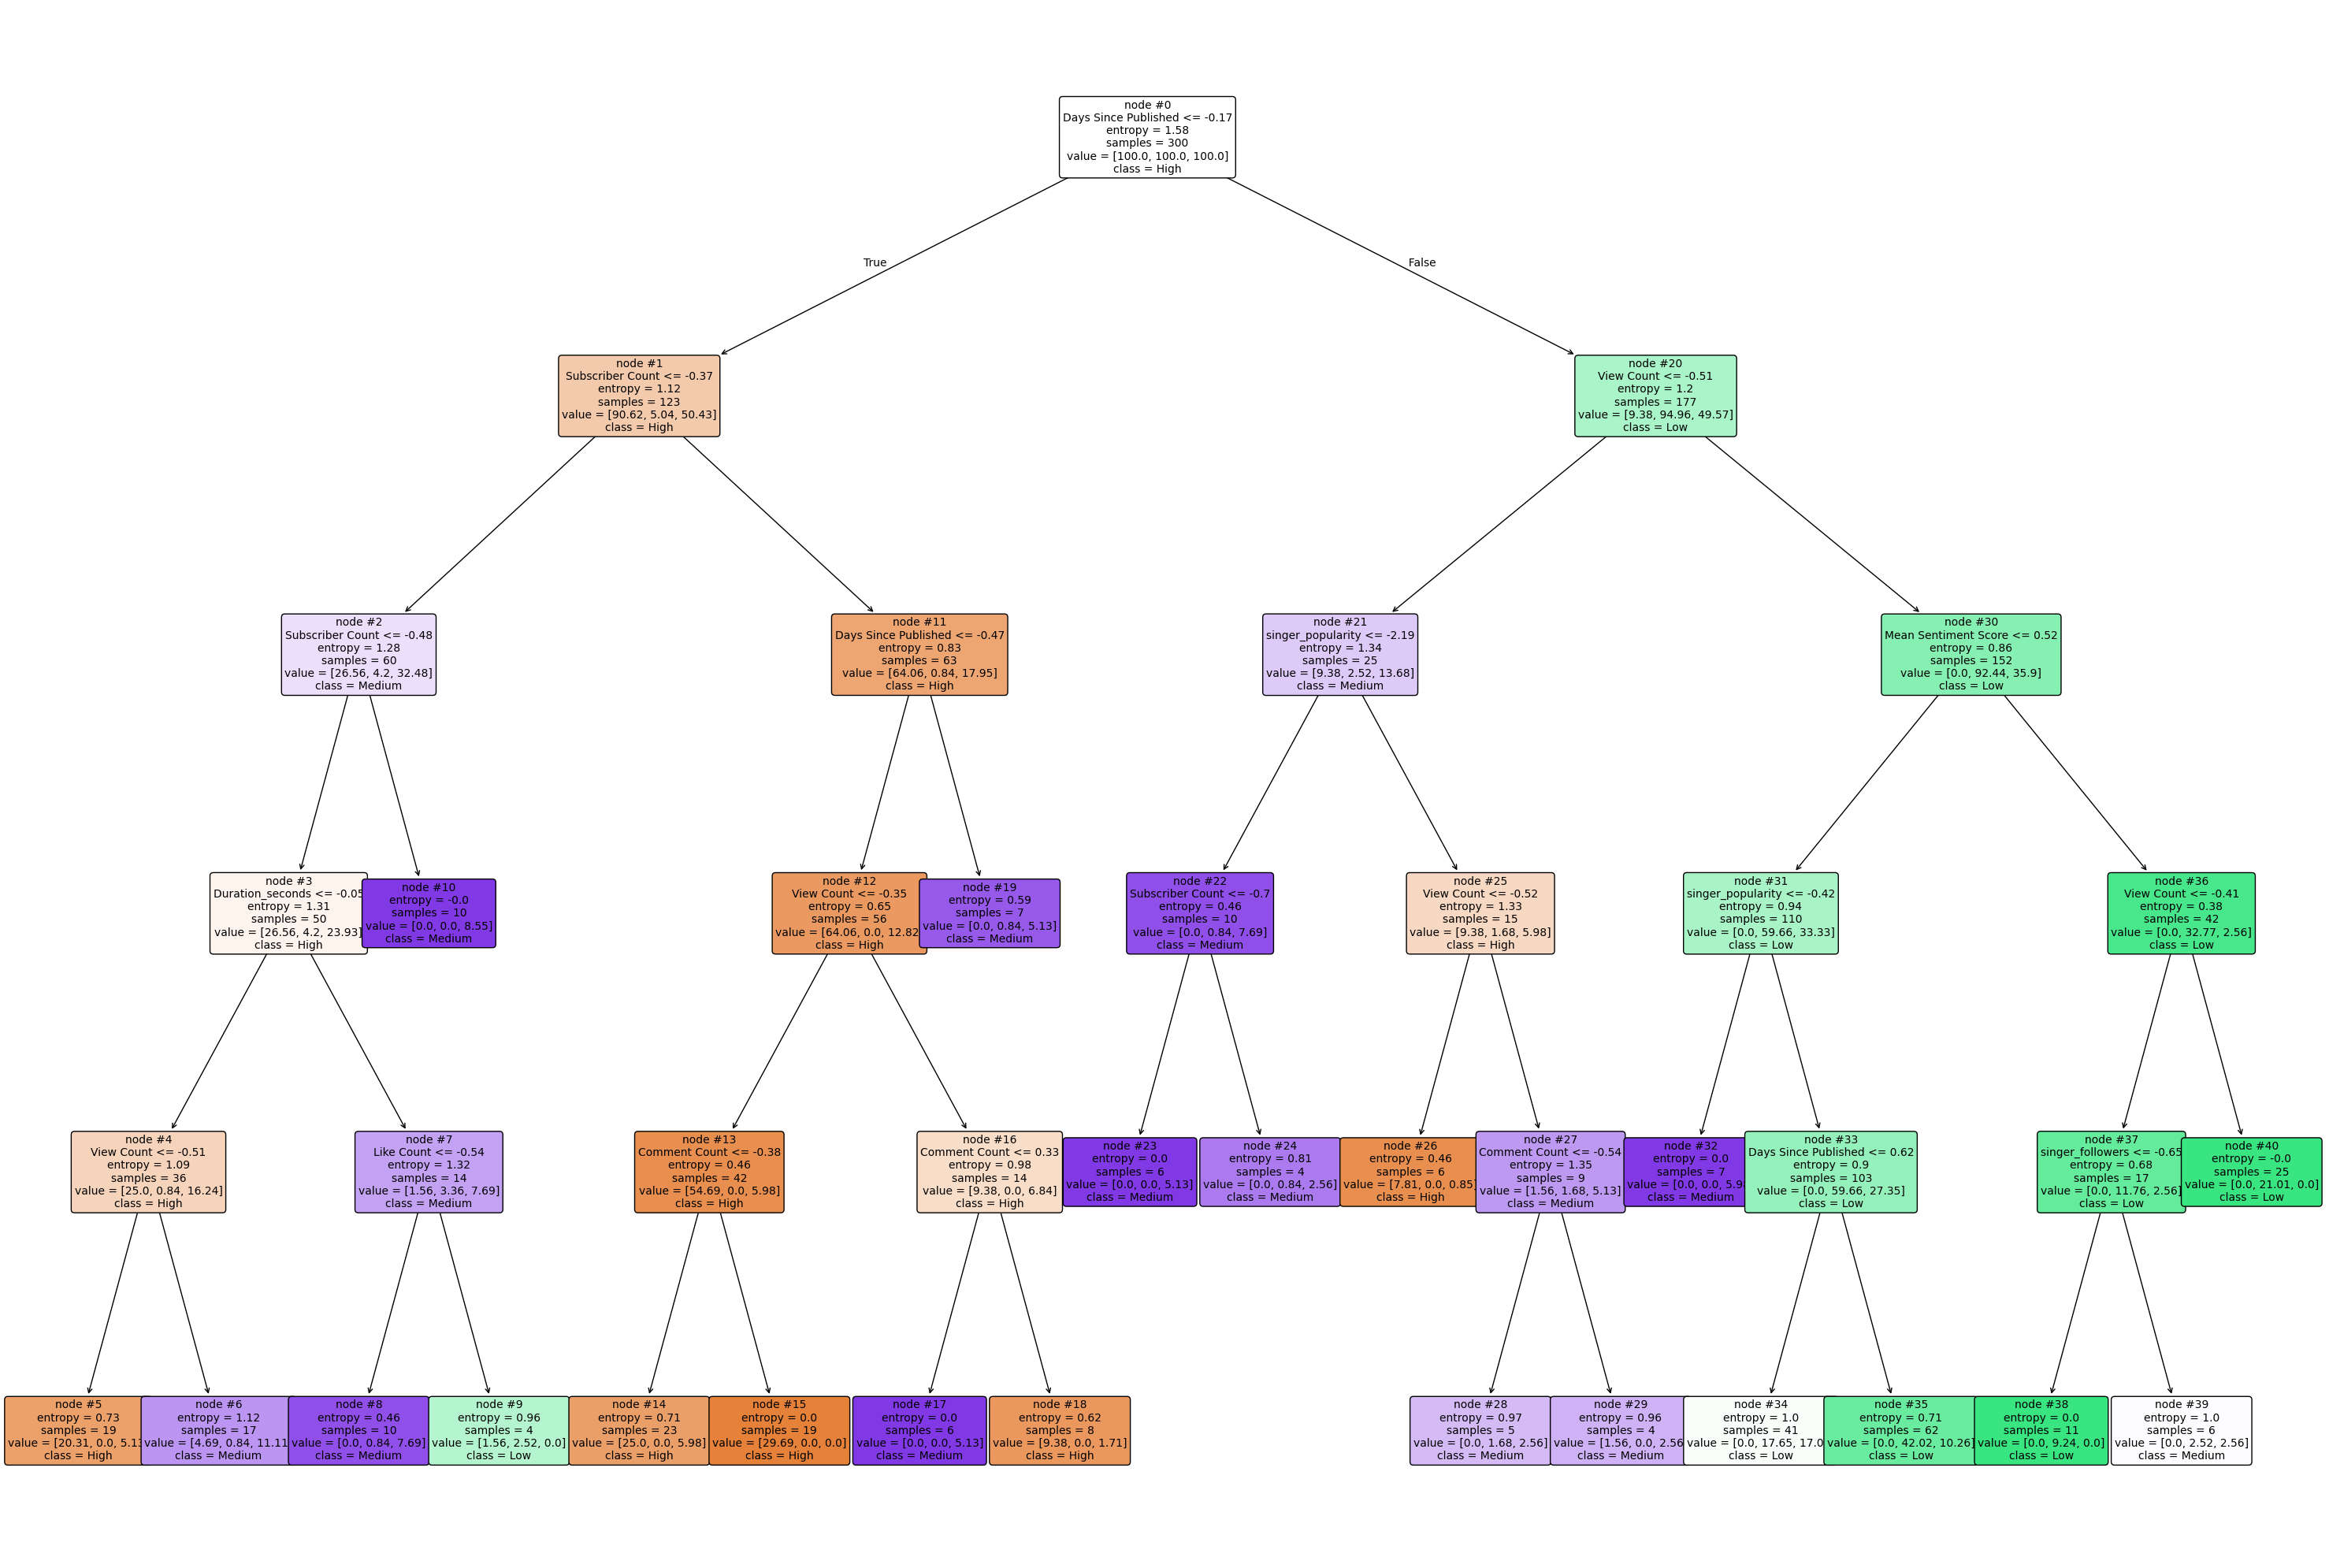

In [196]:
import matplotlib.pyplot as plt
from sklearn import tree

# Assuming 'best_model_refined' is your trained DecisionTreeClassifier model

# Set the size of the plot and DPI for higher resolution
plt.figure(figsize=(30, 20), dpi=100)

# Plot the decision tree with custom font size and node size
tree.plot_tree(
    best_model_refined,  # Here you can use your trained model
    feature_names=features,  # Replace 'features' with the list of feature names
    class_names=best_model_refined.classes_,  # Class names for your target
    filled=True,
    rounded=True,
    fontsize=10,  # Adjust font size here for better readability
    node_ids=True,
    proportion=False,
    precision=2
)

# Adjust the layout and make more space available
plt.tight_layout()

# Show the plot
plt.show()


In [157]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Cross-validation to get a better estimate of the model performance
cross_val_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print("\nRandom Forest Cross-validation scores:", cross_val_scores_rf)
print("\nMean cross-validation score (Random Forest):", cross_val_scores_rf.mean())


Random Forest Accuracy: 0.8

Random Forest Classification Report:
               precision    recall  f1-score   support

        High       0.75      0.82      0.78        11
         Low       0.88      0.80      0.84        35
      Medium       0.74      0.79      0.77        29

    accuracy                           0.80        75
   macro avg       0.79      0.80      0.80        75
weighted avg       0.81      0.80      0.80        75


Random Forest Cross-validation scores: [0.73333333 0.63333333 0.65       0.71666667 0.71666667]

Mean cross-validation score (Random Forest): 0.6900000000000001
